In [1]:
import numpy as np
import pandas as pd
import os
import glob
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

In [3]:
rundir = '/Users/raelynnwonnacott/Desktop/fin16/'
# topo_file = topo.Topography()
# topo_file.read('./base.tt3', topo_type=3)

In [4]:
def custom_div_cmap(numcolors=15, name='custom_div_cmap'):
    from matplotlib.colors import LinearSegmentedColormap 
    
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =colors,
                                             N=numcolors)
    return cmap
colors = ['royalblue', 'royalblue', 'royalblue', 'CornflowerBlue','CornflowerBlue','CornflowerBlue','lightskyblue','lightskyblue','g', 'g', 'g']
cmap1 = custom_div_cmap(11, colors)
colors = ['royalblue', 'royalblue', 'royalblue', 'royalblue','CornflowerBlue','CornflowerBlue','CornflowerBlue','lightskyblue','lightskyblue','g', 'g', 'g','g','red']
cmap2 = custom_div_cmap(11, colors)


In [5]:
dirs = glob.glob('/Users/raelynnwonnacott/Desktop/fin16/5*/')
samples = []
model_params = []
model_output = []
bayes_data = []
debug = []
data = (['samples', 'model_params', 'model_output', 'bayes_data'], [samples, model_params, model_output, bayes_data])

for dir_ in dirs:
    print(dir_)
    for kind,lst in zip(*data):
        k = 1
        df = pd.read_csv(dir_+kind+'.csv', index_col=0).iloc[k:].reset_index(drop=True)[:2000]
        lst.append(df)
        
        

/Users/raelynnwonnacott/Desktop/fin16/56213318_m1/
/Users/raelynnwonnacott/Desktop/fin16/56213319_m1/
/Users/raelynnwonnacott/Desktop/fin16/56213312_m1/
/Users/raelynnwonnacott/Desktop/fin16/56220137_m8/
/Users/raelynnwonnacott/Desktop/fin16/56213323_m1/
/Users/raelynnwonnacott/Desktop/fin16/56213313_m1/
/Users/raelynnwonnacott/Desktop/fin16/56213293_m1/
/Users/raelynnwonnacott/Desktop/fin16/56213330_m1/
/Users/raelynnwonnacott/Desktop/fin16/56213304_m1/
/Users/raelynnwonnacott/Desktop/fin16/56213310_m1/


In [6]:
rundir = '/Users/raelynnwonnacott/Desktop/fin16/'

chains_samples = {}
for file in os.listdir(rundir):
    if file[0] != '.' and file[-3:-1] == '_m':
        try:
            chains_samples[file] = pd.read_csv(os.path.join(rundir, file, "samples.csv"),
                                      index_col=0).reset_index(drop=True)
        except FileNotFoundError:
            print(f"SLURM ID {file[:-3]} has no samples data")
            chains_samples[file] = None

            
chains_params = {}
for file in os.listdir(rundir):
    if file[0] != '.' and file[-3:-1] == '_m':
        try:
            chains_params[file] = pd.read_csv(os.path.join(rundir, file, "model_params.csv"),
                                      index_col=0).reset_index(drop=True)
        except FileNotFoundError:
            print(f"SLURM ID {file[:-3]} has no params data")
            chains_params[file] = None
            
            
chains_output = {}
for file in os.listdir(rundir):
    if file[0] != '.' and file[-3:-1] == '_m':
        try:
            chains_output[file] = pd.read_csv(os.path.join(rundir, file, "model_output.csv"),
                                      index_col=0).reset_index(drop=True)
        except FileNotFoundError:
            print(f"SLURM ID {file[:-3]} has no output data")
            chains_output[file] = None
            
            
chains_bayes_data = {}
for file in os.listdir(rundir):
    if file[0] != '.' and file[-3:-1] == '_m':
        try:
            chains_bayes_data[file] = pd.read_csv(os.path.join(rundir, file, "bayes_data.csv"),
                                      index_col=0).reset_index(drop=True)
        except FileNotFoundError:
            print(f"SLURM ID {file[:-3]} has no bayes_data data")
            chains_bayes_data[file] = None
            
            
chains_debug = {}
for file in os.listdir(rundir):
    if file[0] != '.' and file[-3:-1] == '_m':
        try:
            chains_debug[file] = pd.read_csv(os.path.join(rundir, file, "debug.csv"),
                                      index_col=0).reset_index(drop=True)
        except FileNotFoundError:
            print(f"SLURM ID {file[:-3]} has no debug data")
            chains_debug[file] = None

In [7]:
all_samples=pd.concat(samples,ignore_index=True)
all_model_params=pd.concat(model_params,ignore_index=True)
all_model_output=pd.concat(model_output,ignore_index=True)
all_bayes_data = pd.concat(bayes_data,ignore_index=True)

In [8]:
final_debug_idx = [df.index[-1] for df in debug]
p = np.exp(np.array([df['posterior_logpdf'].iloc[-1] for df in bayes_data]))
p /= p.sum()
resample_idx = np.random.choice(np.arange(len(p)), size=10, p=p)
#this is the resampled index used
resample_idx = [8, 2, 7, 9, 2, 9, 2, 2, 2, 8]

In [10]:
end_samples = np.array([sample.iloc[-1] for sample in samples])

In [11]:
chains_id = ['56213318_m1','56213319_m1','56213312_m1','56220137_m8','56213323_m1','56213313_m1','56213293_m1',
             '56213330_m1','56213304_m1','56213310_m1']
chosen_chains = set(np.array(chains_id)[resample_idx])

In [12]:
resamples = [end_samples[i] for i in resample_idx]

In [13]:
obs_loc = np.array([[129.775, -4.5175], # Pulu Ai
           [128.178, -3.691], # Ambon
           [129.8965, -4.5248], # Banda Neira
           [127.113, -3.3815], # Buru
           [128.557, -3.543], # Hulaliu
           [128.657, -3.576], # Saparua
           [128.562, -3.501], # Kulur
           [128.807, -3.6455], # Ameth
           [128.921, -3.338]]) # Amahai
obs_names = ['Pulu Ai','Ambon','Banda Neira','Buru','Hulaliu','Saparua','Kulur','Ameth','Amahai']

In [14]:
name_loc = obs_loc.copy()
name_loc[0] = (name_loc[0,0]-.5,name_loc[0,1]-.15)
name_loc[1] = (name_loc[1,0]-.5,name_loc[1,1]-.2)
name_loc[2] = (name_loc[2,0]+.05,name_loc[2,1]+.05)
name_loc[3] = (name_loc[3,0]+.05,name_loc[3,1]+.05)
name_loc[4] = (128.25,-4.1)
name_loc[5] = (name_loc[5,0]+.05,name_loc[5,1])
name_loc[-1] = (name_loc[-1,0]+.07,name_loc[-1,1]+.07)
name_loc[-2] = (name_loc[-2,0],name_loc[-2,1]-.15)
name_loc[-3] = (name_loc[-3,0]-.4,name_loc[-3,1])
name_loc[4] = (128.25,-4.1)

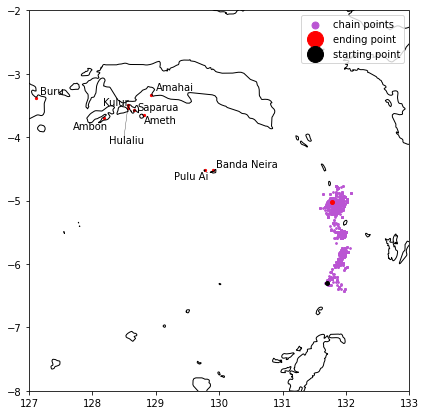

In [27]:
%matplotlib inline
crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(7.5,7))
ax = plt.axes(projection=crs)
ax.set_extent((127,133,-8,-2))
ax.coastlines(resolution='10m')
plt.xticks(np.arange(127,134))
plt.yticks(np.arange(-8,-1))
chosen_chains = list(chosen_chains)
i = 3
plt.scatter(chains_samples[chosen_chains[i]]['longitude'], chains_samples[chosen_chains[i]]['latitude'],s=3,
        label=f'chain points',c='mediumorchid')
x = list(chains_samples[chosen_chains[i]]['longitude'])[-1]
y = list(chains_samples[chosen_chains[i]]['latitude'])[-1]
plt.plot(x,y,'ro',markersize = 4,label = 'ending point')

plt.plot(131.7,-6.3,'ko',markersize = 4,label = 'starting point')
# plt.plot(131.7,-5,'ko',markersize = 4,label = 'starting point')
# plt.plot(130,-6.2,'ko',markersize = 5)
# plt.plot(130.5,-4,'ko',markersize = 5)
# plt.plot(130.4,-5,'ko',markersize = 4, label = 'starting point')
# plt.plot(130.3,-7.2,'ko',markersize = 5)
plt.legend(markerscale = 4)

plt.scatter(obs_loc[:,0],obs_loc[:,1],s=5,c='r')
for loc,name in zip(name_loc,obs_names):
    plt.annotate(name,loc+.01)
plt.plot(np.linspace(128.5,obs_loc[4,0],100),np.linspace(-4,obs_loc[4,1],100),color='k',linewidth=.3)


In [17]:
chosen_chains

['56213330_m1', '56213304_m1', '56213310_m1', '56213312_m1']

In [23]:
chains_idx = [('56213304_m1',2),('56213310_m1',2),('56213312_m1',5),('56213330_m1',1)]
print(chains_samples.keys())
print(resample_idx)

dict_keys(['56213318_m1', '56213319_m1', '56213312_m1', '56220137_m8', '56213323_m1', '56213313_m1', '56213293_m1', '56213330_m1', '56213304_m1', '56213310_m1'])
[8, 2, 7, 9, 2, 9, 2, 2, 2, 8]


In [140]:
for i in range(len(chosen_chains)):
    print(f'CHAIN {i}')
    print(chains_samples[chosen_chains[i]].iloc[-1])
    print()


CHAIN 0
latitude           -5.017028e+00
longitude           1.317805e+02
initial_velocity    9.821593e+01
volume              1.704075e+10
thickness           5.787002e+01
aspect_ratio        3.802220e-01
Name: 2832, dtype: float64

CHAIN 1
latitude           -5.088344e+00
longitude           1.319801e+02
initial_velocity    8.722030e+01
volume              2.797219e+10
thickness           3.877575e+01
aspect_ratio        3.772841e-01
Name: 2852, dtype: float64

CHAIN 2
latitude           -5.580897e+00
longitude           1.304733e+02
initial_velocity    2.604463e+01
volume              8.933493e+09
thickness           3.233858e+01
aspect_ratio        3.785290e-01
Name: 2552, dtype: float64

CHAIN 3
latitude           -5.068652e+00
longitude           1.317683e+02
initial_velocity    4.442885e+01
volume              1.938559e+10
thickness           5.510168e+01
aspect_ratio        3.926010e-01
Name: 3422, dtype: float64

